# Tarea semanal 2

Yanina Corsaro

1- Definición de mi_funcion_DFT

In [1]:
import numpy as np

def mi_funcion_DFT( y, N, fs  ):
    
    def twiddle_factor(k, n, N):
        Wk = np.cos(2*np.pi*k*n/N ) - np.sin(2*np.pi*k*n/N)*1j
        return Wk
    frq = np.linspace( start= 0, stop= fs ,num = N)    
    dft = []
    for k in range(0,N):
        res = 0
        for n in range(0,N):
            res = res + twiddle_factor(k, n, N)*y[n]
        dft.append(res) 
    dft = np.array(dft)       
    return frq, dft

2- Prueba de mi_funcion_DFT

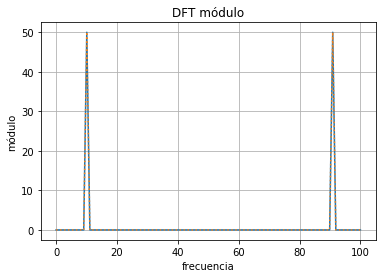

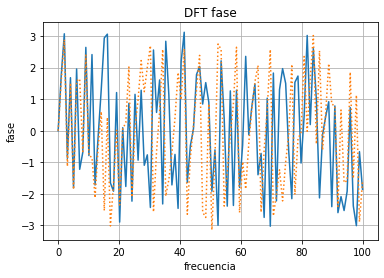

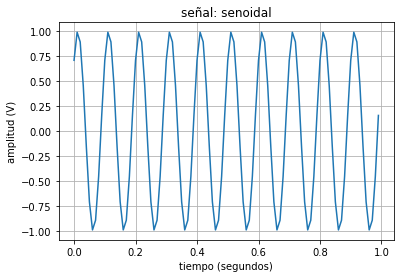

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sen import mi_funcion_sen
from scipy.fftpack import fft, fftfreq
from funcionDFT import mi_funcion_DFT

# defino parámetros
N  = 100 # muestras
fs = 100 # Hz
a0 = 1       # Volts
p0 = np.pi/4# radianes
f0 = 10    # Hz
dt = 1/(fs)

# obtengo función senoidal
tt, y= mi_funcion_sen( vmax=a0 , dc=0 , ff=f0 , ph=p0, nn=N , fs=fs )

# calculo dft con la funcion de scipy
fft = fft(y)
fftabs=np.abs(fft)
fftangle=np.angle(fft)

# calculo dft con mi funcion
frq, XX = mi_funcion_DFT( y, N, fs  )  
xfabs=np.abs(XX)
xfangle=np.angle(XX)


# grafico módulo de la dft, de mi función en rayitas y de la fft punteada
fig, ax = plt.subplots()
ax.plot(frq, xfabs, "-", frq, fftabs, ":")
ax.set(xlabel='frecuencia', ylabel='módulo',title='DFT módulo')
ax.grid()
plt.show()

# grafico fase de la dft, de mi función en rayitas y de la fft punteada
fig, ax1 = plt.subplots()
ax1.plot(frq, xfangle, "-", frq, fftangle, ":")
ax1.set(xlabel='frecuencia', ylabel='fase',title='DFT fase')
ax1.grid()
plt.show()

# grafico la señal senoidal que fue analizada
fig, ax = plt.subplots()
ax.plot(tt, y)
ax.set(xlabel='tiempo (segundos)', ylabel='amplitud (V)',title='señal: senoidal')
ax.grid()
plt.show()


Podemos ver que los gráficos del módulo de la función creada y la fft de scipy coinciden, y además la delta de kronecker esta posicionada en la frecuencia de fo=10.

3- DFT para una señal aleatoria:

Para esto utilizamos la función random: y = (b - a) * random_sample() + a

Ruido uniforme de Varianza = 4. Según wikipedia Varianza = (b-a)^2/12, entonces (b-a)^2/12 = 4,  b-a ~ 7

Si elegimos a = 0 queda b = 7

Por lo tanto la función nos queda:  y = 7 * np.random.random_sample(), a la cual le tenemos que pasar como parámetro la cantidad de números que queremos que genere.


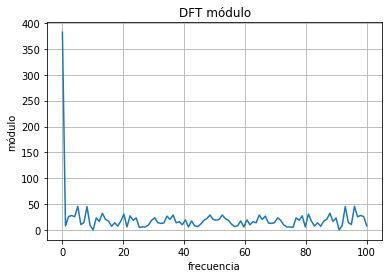

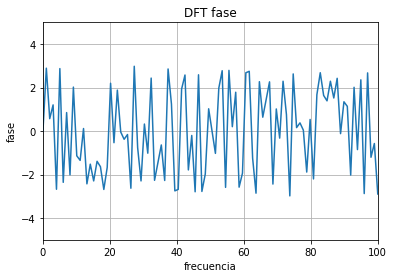

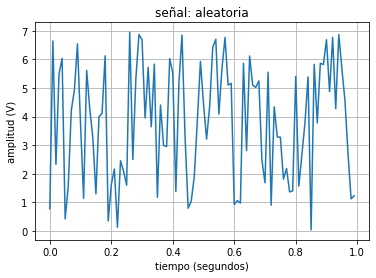

In [5]:
from numpy import random

y1 = 7 * random.random_sample(N,)
y = y1.flatten()

tt = np.linspace( start= 0, stop= (N-1)/fs ,num = N)


# calculo dft con mi funcion
frq, XX = mi_funcion_DFT( y, N, fs  )  
xfabs=np.abs(XX)
xfangle=np.angle(XX)


# grafico módulo de la dft
fig, ax = plt.subplots()
ax.plot(frq, xfabs, "-")
ax.set(xlabel='frecuencia', ylabel='módulo',title='DFT módulo')
ax.grid()
plt.show()

# grafico fase de la dft
fig, ax1 = plt.subplots()
ax1.plot(frq, xfangle, "-")
ax1.set(xlabel='frecuencia', ylabel='fase',title='DFT fase')
ax1.grid()
plt.xlim(0, 100)
plt.ylim(-5, 5)
plt.show()

# grafico la señal aleatoria que fue analizada
fig, ax = plt.subplots()
ax.plot(tt, y)
ax.set(xlabel='tiempo (segundos)', ylabel='amplitud (V)',title='señal: aleatoria')
ax.grid()
plt.show()

En el spider también la analicé con la fft, pero acá el mismo código me tiraba error: TypeError: 'numpy.ndarray' object is not callable, así que lo dejé solo con la DFT creada.